In [1]:
from model import knn
from utils import load_data
import importlib
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [61]:
# load data from given csv
df = pd.read_csv("Data\\train_data_3sec.csv", header=0)

# Extract features and labels
features = df.iloc[:, 2:-1].values  # Assuming your features start from the second column
labels = df.iloc[:, -1].values

# Convert labels to numeric format if needed
# For example, if labels are strings like 'blues', you can encode them into numbers
unique_labels = np.unique(labels)
label_mapping = {label: i for i, label in enumerate(unique_labels)}
numeric_labels = np.array([label_mapping[label] for label in labels])

# Convert features to a numpy array
features_array = np.array(features, dtype=np.float32)
numeric_labels.shape
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features_array)

In [95]:
# to do train test split properly - based on song,
# we need to know how many samples from each file we have - should have 10, but do not
file_names = df.iloc[:,0].values
categories = np.array(['.'.join(name.split('.')[:2]) for name in file_names])#file_names_unique = 
unique_values, counts = np.unique(categories, return_counts=True)
unique_categories_with_indices = list(enumerate(unique_values))
first_instance_indices = {category: np.where(categories == category)[0][0] for category in unique_values}
counts_dict = dict(zip(range(len(unique_values)), [(count, first_instance_indices[category]) for category, count in zip(unique_values, counts)]))
print(counts_dict)
#unique_values, counts = np.unique(categories, return_counts=True)
#counts_dict = dict(zip(unique_values, counts))

# Print or use the counts
#for key, value in counts_dict.items():
#    print(f"{key}: {value} instances")
    
    ##
    '''
for key, value in counts_dict.items():
    if value != 10:
        # Get the third values for the category
        third_values = [int(name.split('.')[2]) for name in file_names if '.'.join(name.split('.')[:2]) == key]

        print(f"{key}: {value} instances")
        print(f"Third values: {third_values}")
        print()'''
# above code establishes that it sometimes misses the last sample


#num_songs = len(unique_values)
# Print the number of unique categories
print(f"Number of unique categories: {len(unique_values)}")
#counts_dict = dict(zip(range(len(unique_values)), counts))
counts_dict[1]

blues.00000: 10 instances
blues.00001: 10 instances
blues.00002: 10 instances
blues.00004: 10 instances
blues.00005: 10 instances
blues.00007: 10 instances
blues.00009: 10 instances
blues.00010: 10 instances
blues.00011: 10 instances
blues.00013: 10 instances
blues.00015: 10 instances
blues.00016: 10 instances
blues.00017: 10 instances
blues.00018: 10 instances
blues.00019: 10 instances
blues.00020: 10 instances
blues.00021: 10 instances
blues.00022: 10 instances
blues.00023: 10 instances
blues.00024: 10 instances
blues.00025: 10 instances
blues.00026: 10 instances
blues.00030: 10 instances
blues.00031: 10 instances
blues.00032: 10 instances
blues.00033: 10 instances
blues.00034: 10 instances
blues.00037: 10 instances
blues.00038: 10 instances
blues.00039: 10 instances
blues.00041: 10 instances
blues.00042: 10 instances
blues.00044: 10 instances
blues.00045: 10 instances
blues.00046: 10 instances
blues.00047: 10 instances
blues.00049: 10 instances
blues.00050: 10 instances
blues.00052:

(10, 10)

In [118]:
len(counts_dict)

800

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import utils.n_fold_cv
X=normalized_features
y=numeric_labels
X_train, X_test, y_train, y_test = next(utils.n_fold_cv.n_fold_cv(X, y, counts_dict))
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print(acc)

0.575984990619137


In [141]:
  
def backwardSequentialFeatureSelect3Sec(X,y, k, samples_per_song, min_features=1):
    # for 3 second features - we must tts based on song, not each sample
    # for knn
    # with 5-fold cross validation
    
    #X_train, X_val, y_train, y_val = tts_3_sec(normalized_features, numeric_labels, test_size=0.2, random_state=42)
    feat_sel = list(range(X.shape[1]))
    best_feat_sel = feat_sel
    best_score = 0
    while len(feat_sel) > min_features:
        worst_feat = None
        worst_perf = 1
        for feat in feat_sel:
            this_feat = feat_sel.copy()
            this_feat.remove(feat)
            # now do 5-fold cross validation
            accuracy_sum = 0
            for X_train, X_val, y_train, y_val in n_fold_cv(X, y, samples_per_song, n=5):
                # Your training and validation process here
                # compute score
                X_train_subset = X_train[:, this_feat]
                X_val_subset = X_val[:, this_feat]
                # use sklearn knn
                knn = KNeighborsClassifier(n_neighbors=k)
                knn.fit(X_train_subset, y_train)
                # Make predictions on the test set
                y_pred = knn.predict(X_val_subset)

                # Evaluate the accuracy of the model
                #print(y_val)
                #print(y_pred)
                #print()
                accuracy = accuracy_score(y_val, y_pred)
                accuracy_sum += accuracy
                
            #print(this_feat)    
            accuracy_average = accuracy_sum /5
            #print(accuracy_average)
            if accuracy_average < worst_perf:
                worst_feat = feat
                worst_perf = accuracy_average
            if accuracy_average > best_score:
                best_feat_sel = this_feat
                best_score = accuracy_average
        feat_sel.remove(worst_feat)
        print(best_feat_sel)
        print(best_score)
    return best_feat_sel, best_score
        

In [148]:
best_k= 0 
bestest_score = 0
bestest_feat = 0
best_for_each_k = []
for k in range(10,15):
    best_feat, best_score = backwardSequentialFeatureSelect3Sec(normalized_features, numeric_labels,k, counts_dict)
    best_for_each_k.append((k,best_feat,best_score))
    if best_score > bestest_score:
        best_k = k
        bestest_feat = best_feat
        bestest_score = best_score

[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6592517755934756
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6592517755934756
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6592517755934756
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6592517755934756
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 

[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6592517755934756
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6592517755934756
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6592517755934756
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6592517755934756
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6632534961032435
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6632534961032435
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6632534961032435
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6632534961032435
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6632534961032435
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6632534961032435
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6632534961032435
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6632534961032435
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6611285744727814
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6611285744727814
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6611285744727814
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6611285744727814
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6631290438094523
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6631290438094523
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6631290438094523
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6631290438094523
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6631290438094523
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6631290438094523
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6631290438094523
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6631290438094523
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6630031833099692
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6630031833099692
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6630031833099692
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
0.6630031833099692
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 

In [147]:
print(best_for_each_k)

[(5, [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56], 0.6498713799339544), (6, [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56], 0.6522477095744289), (7, [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56], 0.6573764638764372), (8, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56], 0.6587516193435979), (9, [0, 1, 2, 3, 4, 5, 6, 7, 8, 

In [25]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt


X = normalized_features
y = numeric_labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Initialize Sequential Feature Selector
sfs = SequentialFeatureSelector(knn,
                                k_features='best',  # number of features to select, 'best' will select the best set
                                forward=False,  # backward selection
                                floating=False,  # no floating features
                                scoring='accuracy',  # use accuracy as the evaluation criterion
                                cv=5)  # 5-fold cross-validation

# Perform backward feature selection
sfs.fit(X_train, y_train)

# Get the selected features
selected_features = list(sfs.k_feature_idx_)

# Print the selected features
print("Selected features indices:", selected_features)

# Train the model with the selected features
knn.fit(X_train[:, selected_features], y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test[:, selected_features])

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Selected features indices: [0, 2, 3, 5, 7, 9, 10, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36, 37, 39, 40, 41, 42, 43, 45, 47, 54, 55]
Accuracy: 0.6375


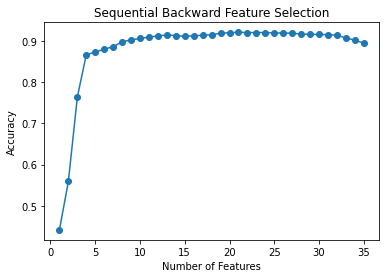

In [10]:
# Plot performance vs. number of features
fig = plt.figure()
k_feat = [k + 1 for k in sfs.k_feature_idx_]  # Adjust indices to be 1-based
scores = [sfs.get_metric_dict()[k]['avg_score'] for k in k_feat]
plt.plot(range(1, len(k_feat) + 1), scores, marker='o')
plt.title('Sequential Backward Feature Selection')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.show()




In [23]:
selected_features = np.asarray(selected_features) + 2
best_feature_names = df.columns[selected_features]

# Print or use the names as needed
print("Names of the best features:", best_feature_names)

Names of the best features: Index(['chroma_stft_mean', 'rms_mean', 'rms_var', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var',
       'zero_crossing_rate_mean', 'harmony_mean', 'perceptr_mean',
       'perceptr_var', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean',
       'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean', 'mfcc13_mean',
       'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean',
       'mfcc17_mean', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var',
       'mfcc20_mean'],
      dtype='object')


In [24]:
# Create a KNN classifier
knn1 = KNeighborsClassifier(n_neighbors=3)

# Initialize Sequential Feature Selector
sfs1 = SequentialFeatureSelector(knn,
                                k_features='best',  # number of features to select, 'best' will select the best set
                                forward=True,  # backward selection
                                floating=False,  # no floating features
                                scoring='accuracy',  # use accuracy as the evaluation criterion
                                cv=5)  # 5-fold cross-validation

# Perform backward feature selection
sfs1.fit(X_train, y_train)

# Get the selected features
selected_features1 = list(sfs1.k_feature_idx_)

# Print the selected features
print("Selected features indices:", selected_features1)

# Train the model with the selected features
knn1.fit(X_train[:, selected_features1], y_train)

# Make predictions on the test set
y_pred = knn1.predict(X_test[:, selected_features1])

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected features indices: [0, 2, 3, 5, 6, 7, 12, 13, 14, 15, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 35, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49, 51, 53, 54, 55, 56]
Accuracy: 0.9099437148217636


In [11]:
# Import necessary libraries
# now we cook with hyperparameters
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt



X = normalized_features
y = numeric_labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Sequential Feature Selector
sfs = SequentialFeatureSelector(KNeighborsClassifier(), 
                                k_features='best', 
                                forward=False, 
                                floating=False, 
                                scoring='accuracy', 
                                cv=5)

best_k = None
best_accuracy = 0
best_selected_features = None

# Iterate over different values of k
for k_value in range(1, 11):  # You can adjust the range as needed
    knn = KNeighborsClassifier(n_neighbors=k_value)
    
    # Set the classifier for feature selection
    sfs.estimator = knn
    
    # Perform backward feature selection
    sfs.fit(X_train, y_train)
    
    # Get the selected features
    selected_features = list(sfs.k_feature_idx_)
    
    # Train the model with the selected features
    knn.fit(X_train[:, selected_features], y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test[:, selected_features])
    
    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check if the current k gives a higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k_value
        best_selected_features = selected_features

# Print the best k and selected features
print("Best k:", best_k)
print("Best selected features indices:", best_selected_features)

# Train the model with the best selected features and k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train[:, best_selected_features], y_train)

# Make predictions on the test set with the best model
y_pred_best = best_knn.predict(X_test[:, best_selected_features])

# Evaluate the accuracy of the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Accuracy:", accuracy_best)


Best k: 1
Best selected features indices: [0, 2, 3, 6, 7, 10, 12, 14, 15, 17, 18, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 41, 42, 43, 44, 45, 47, 48, 49, 53, 55, 56]
Best Accuracy: 0.9480925578486554


In [12]:
selected_features = np.asarray(best_selected_features) + 2
best_feature_names = df.columns[selected_features]

# Print or use the names as needed
print("Names of the best features:", best_feature_names)

Names of the best features: Index(['chroma_stft_mean', 'rms_mean', 'rms_var', 'spectral_bandwidth_mean',
       'spectral_bandwidth_var', 'zero_crossing_rate_mean', 'harmony_mean',
       'perceptr_mean', 'perceptr_var', 'mfcc1_mean', 'mfcc1_var',
       'mfcc2_mean', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc5_mean',
       'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var',
       'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc13_mean', 'mfcc13_var',
       'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc16_mean', 'mfcc16_var',
       'mfcc17_mean', 'mfcc19_mean', 'mfcc20_mean', 'mfcc20_var'],
      dtype='object')


In [13]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

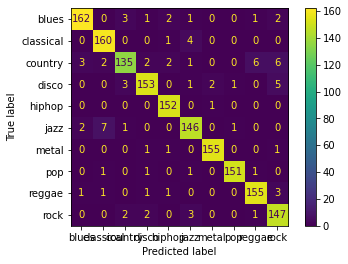

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

y_pred = best_knn.predict(X_test[:, best_selected_features])
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot()

plt.show()


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_basic = KNeighborsClassifier(n_neighbors=1)
knn_basic.fit(X_train, y_train)
y_pred = knn_basic.predict(X_test)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)

In [18]:
accuracy


0.9355847404627893

In [19]:
y_test

array([6, 3, 4, ..., 1, 5, 8])

In [20]:
y_pred

array([6, 3, 4, ..., 1, 5, 8])